#### OBJECTIVE
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

#### Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [4]:
#Reading the dataset into a dataframe
df = pd.read_csv('letter-recognition.csv')

In [5]:
#Viewing the initial records of the df
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
#Viewing the column names of the df
df.columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

We can find that some of the column names here are having spaces in between and not present properly, hence we can rename those column names.

In [7]:
df.columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar','ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge','xedgey', 'yedge', 'yedgex']

In [8]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [9]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
#Initial dimension of the dataframe
df.shape

(20000, 17)

We are having a dataset with 20000 records and 17 attributes.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
xbox      20000 non-null int64
ybox      20000 non-null int64
width     20000 non-null int64
height    20000 non-null int64
onpix     20000 non-null int64
xbar      20000 non-null int64
ybar      20000 non-null int64
x2bar     20000 non-null int64
y2bar     20000 non-null int64
xybar     20000 non-null int64
x2ybar    20000 non-null int64
xy2bar    20000 non-null int64
xedge     20000 non-null int64
xedgey    20000 non-null int64
yedge     20000 non-null int64
yedgex    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


From the above info, we can see that there are no NULL values present for any of the attributes. And also the type of every column seems to be correct. Hence there are no data cleaning part to be done in this case.

#### EDA and Visualisation

In [12]:
order = list(np.sort(df['letter'].unique()))
print(order)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


We just verified whether our dataset contains all the alphabets records present so that our model once built can correctly predict for any of these characters.

In [13]:
#Importing the counter
from collections import Counter

In [14]:
#Finding out the count instances for each letter in the dataset and passing it to dictionary after sorting
counts = dict(Counter(np.sort(df['letter'])))

In [15]:
print(counts)

{'A': 789, 'B': 766, 'C': 736, 'D': 805, 'E': 768, 'F': 775, 'G': 773, 'H': 734, 'I': 755, 'J': 747, 'K': 739, 'L': 761, 'M': 792, 'N': 783, 'O': 753, 'P': 803, 'Q': 783, 'R': 758, 'S': 748, 'T': 796, 'U': 813, 'V': 764, 'W': 752, 'X': 787, 'Y': 786, 'Z': 734}


From the above we can see that the count for each letter in the dataframe is more or less same or in comparable range.

<BarContainer object of 26 artists>

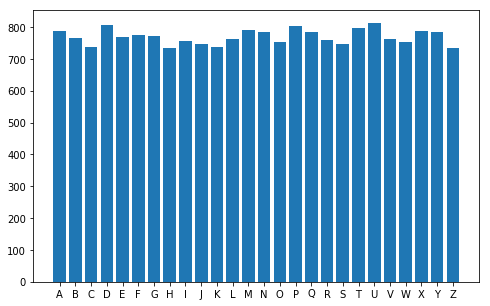

In [16]:
plt.figure(figsize=(8,5))
plt.bar(counts.keys(),counts.values())

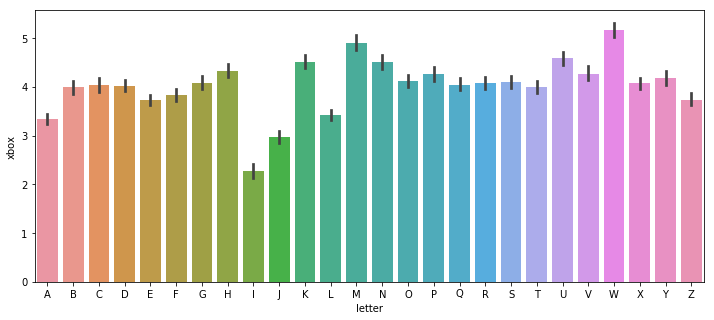

In [17]:
#Plot between the letter and the horizontal position of the box
plt.figure(figsize=(12,5))
sns.barplot(x='letter',y='xbox',data=df,order=order)
plt.show()

We know from the data dictionary that the `xbox` is the horizontal position of the box. From the above plot we can see that xbox values tends to be lowest for characters such as `I`,`J`,`L` which are characters that are more into vertically than spread out characters.

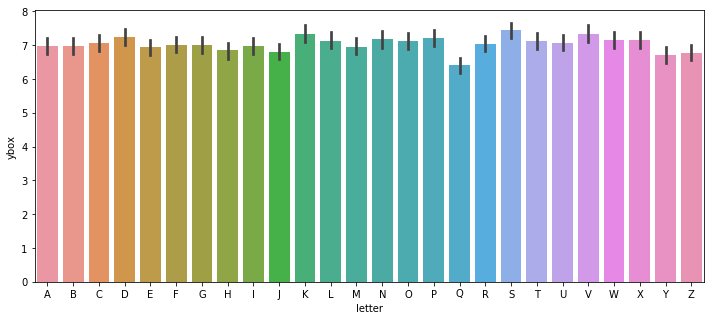

In [18]:
#Plot between the letter and the horizontal position of the box
plt.figure(figsize=(12,5))
sns.barplot(x='letter',y='ybox',data=df,order=order)
plt.show()

From the above barplot between letters and vertical position of the box, we can see almost all letters are having more or less the same vertical position values.

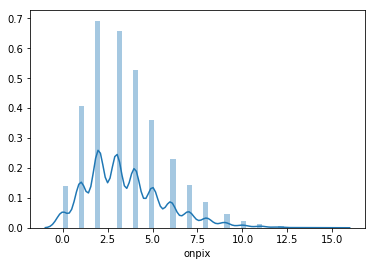

In [19]:
sns.distplot(df['onpix'])

In [22]:
letter_mean = df.groupby('letter').mean()

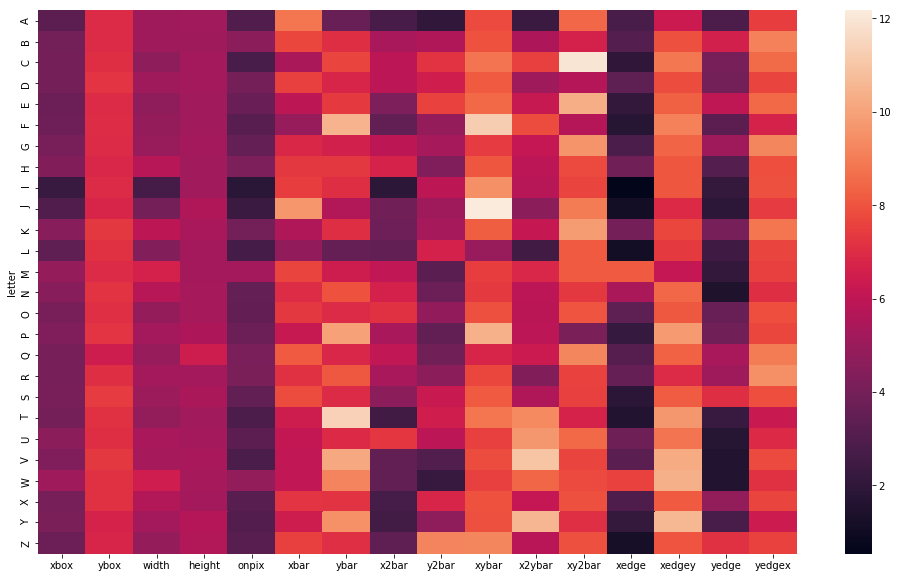

In [24]:
#Plotting the correlation map between all the attributes.
plt.figure(figsize=(17,10))
sns.heatmap(letter_mean)
plt.show()

Some insights we can derive or observations we can make from the above correlation plot is that, <br>
1.`ybox` attribute is almost with same correlation with all the letters <br>
2.`I` is one alphabet that we can see very less correlated with features such as `xbox,width,onpix,x2bar,xedge`. In other ways all these features are related to the x-axis or spread in x-axis. <br>
3.`xedge` feature is highly negatively correlated with most of the alphabets present except a few such as `m` and `w`. <br>

#### Data Preparation and Train -Test split

Most of the times the features are in different range hence a need to standardise or normalise. Before that we can see the range for each data present.

In [25]:
#Average feature values
round(df.drop('letter', axis=1).mean(),2)

xbox      4.02
ybox      7.04
width     5.12
height    5.37
onpix     3.51
xbar      6.90
ybar      7.50
x2bar     4.63
y2bar     5.18
xybar     8.28
x2ybar    6.45
xy2bar    7.93
xedge     3.05
xedgey    8.34
yedge     3.69
yedgex    7.80
dtype: float64

You can see by analysing the average feature value, that for all the features comes under more or less same range. But still we can go ahead and rescale them.

In [26]:
#Splitting into X and y
X = df.drop('letter',axis=1)
y = df['letter']

In [30]:
#Scaling the features.
from sklearn.preprocessing import scale
X_scaled = scale(X)

In [31]:
#Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=101)

In [33]:
X_train.shape

(14000, 16)

In [34]:
X_test.shape

(6000, 16)

In [35]:
y_train.shape

(14000,)

In [36]:
y_test.shape

(6000,)

### Model Building

### SVM - LINEAR KERNEL

In [37]:
linar_SVC = SVC(kernel='linear')
linar_SVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
#Predict
y_pred = linar_SVC.predict(X_test)

In [39]:
#Accuracy -Metrics
print("accuracy",metrics.accuracy_score(y_true=y_test,y_pred=y_pred))

accuracy 0.849


Accuracy score we are getting with the linear kernel is around 85% without hyper paramater tuning and default C of 1.

#### Hyper Parameter Tuning with Grid Search

In [41]:
#Creating a KFold object with 5 splits
folds = KFold(n_splits=5,shuffle=True,random_state=101)

# specify range of hyperparameters
hyper_params = [{'C':[1,10,100,1000]}]

linar_SVC = SVC()

#Setup grid search CV
model_cv = GridSearchCV(estimator=linar_SVC,
                       param_grid=hyper_params,
                       scoring='accuracy',
                       cv=folds,
                       verbose=1,
                       return_train_score=True)

#Fit the model
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid=[{'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [42]:
#cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.946083,0.082053,2.587241,0.022021,1,{'C': 1},0.967857,0.967143,0.958214,0.969643,...,0.965643,0.003960,4,0.993661,0.994286,0.994107,0.994375,0.993661,0.994018,0.000304
1,10.155130,1.593411,2.409939,0.260370,10,{'C': 10},0.975000,0.971786,0.967500,0.970357,...,0.971286,0.002429,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,10.285896,0.464664,2.458241,0.126836,100,{'C': 100},0.975000,0.972143,0.967500,0.970357,...,0.971500,0.002489,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,10.445426,0.713028,2.106184,0.398758,1000,{'C': 1000},0.975000,0.972143,0.967500,0.970357,...,0.971500,0.002489,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [43]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

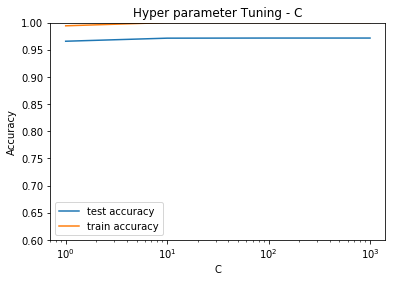

In [50]:
# # plotting
plt.figure(figsize=(6,4))
plt.plot(cv_results["param_C"], cv_results["mean_test_score"])
plt.plot(cv_results["param_C"], cv_results["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Hyper parameter Tuning - C")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='bottom right')
plt.xscale('log')

We can see that, best hyper paramater value to be selected here is 1 which is same as the default value with which we fit the model early.

### SVM - RBF KERNEL

In [51]:
# Non-Linear model
# Using RBF kernel, C=1, default value of gamma
#Model
non_linear_model = SVC(kernel='rbf')
#Fit
non_linear_model.fit(X_train, y_train)
#Predict
y_pred = non_linear_model.predict(X_test)

In [53]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy: 0.9678333333333333


#### Hyper Parameter Tuning with Grid Search

In [54]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 17.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [55]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.046013,0.048855,2.490159,0.012347,1,0.01,"{'C': 1, 'gamma': 0.01}",0.927857,0.928571,0.922143,...,0.928429,0.003870,5,0.945089,0.945179,0.945804,0.944821,0.946161,0.945411,0.000494
1,6.573097,0.033897,3.388235,0.031780,1,0.001,"{'C': 1, 'gamma': 0.001}",0.785357,0.798571,0.792500,...,0.794429,0.007234,10,0.804018,0.805357,0.805357,0.801607,0.803661,0.804000,0.001380
2,14.315946,0.043457,4.048297,0.019383,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.606429,0.601786,0.614286,...,0.597714,0.014078,12,0.608036,0.605804,0.619107,0.610446,0.585179,0.605714,0.011215
3,3.363775,0.012458,1.868163,0.016744,10,0.01,"{'C': 10, 'gamma': 0.01}",0.967857,0.965714,0.957857,...,0.965429,0.003934,2,0.989821,0.989375,0.990268,0.990625,0.990089,0.990036,0.000421
4,3.598639,0.028836,2.384028,0.010568,10,0.001,"{'C': 10, 'gamma': 0.001}",0.879643,0.877143,0.861786,...,0.876643,0.008258,8,0.892500,0.890536,0.895089,0.889286,0.893482,0.892179,0.002066
5,6.448453,0.088343,3.407606,0.014705,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.777857,0.783929,0.782857,...,0.783357,0.005064,11,0.793036,0.790714,0.792411,0.788393,0.790714,0.791054,0.001617
6,3.391405,0.054217,1.795216,0.016633,100,0.01,"{'C': 100, 'gamma': 0.01}",0.967500,0.965000,0.960000,...,0.965643,0.003017,1,0.999375,0.999464,0.999464,0.999286,0.999286,0.999375,0.000080
7,3.633316,0.023057,1.684313,0.015575,100,0.001,"{'C': 100, 'gamma': 0.001}",0.928571,0.925000,0.918571,...,0.926429,0.004886,6,0.953036,0.952321,0.953750,0.951339,0.953929,0.952875,0.000956
8,3.888281,0.064375,2.458995,0.018137,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.846071,0.843571,0.831429,...,0.843786,0.008316,9,0.859107,0.853839,0.860625,0.854732,0.858482,0.857357,0.002618
9,3.434740,0.023476,1.789070,0.014028,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.965357,0.962500,0.959286,...,0.963929,0.002701,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


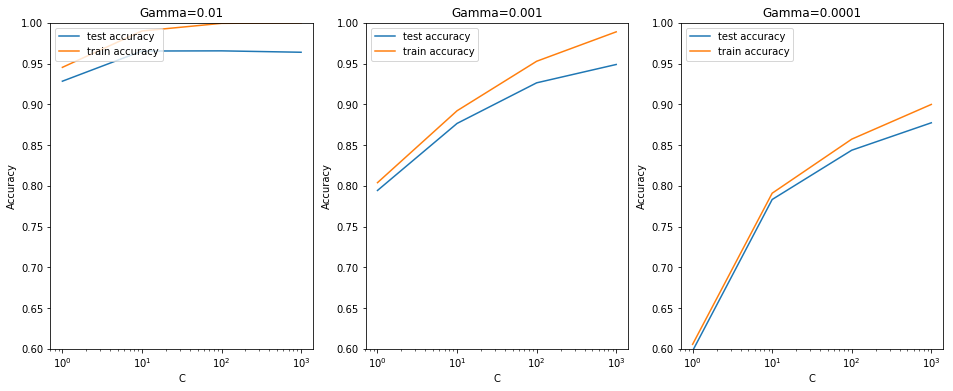

In [56]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

From the above plots we can see that, the non-linear kernel is performing the best compared to linear SVM model which gave lesser accuracy. Comparing for the different Gamma values, we can see that Gamma value of 0.01 and C of 1 or 100 would be the best choice for the hyper paramaters.

In [58]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9656428571428571 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


#### Final Model

In [59]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.97


Hence we can see that a non linear model is giving here a better accuracy hence the dataset tends to be more non-linear.